#PS1.A

In [41]:
import numpy as np # importing and aliasing array manipulation and math library
import pandas as pd # importing and aliasing data manipulation and analysis library
import seaborn as sns # importing and aliasing data vizualization library
from pylab import rcParams # importing object that controls behavior of pylab plotting functions
import matplotlib.pyplot as plt # importing and aliasing a plot generating module
from matplotlib import rc # importing plot customizing module
from tensorflow.keras.models import Sequential # importing model object that groups linear stack of layers
from tensorflow.keras.layers import LSTM # importing layer object that works well with time series data
from tensorflow.keras.layers import Dense # importing layer object whose neurons connect to every neuron in previous layer
from tensorflow.keras.optimizers import Adam # importing optimizer object that implements Adam algorithm

%matplotlib inline # draws plots after cell
%config InlineBackend.figure_format='retina' # renders high resolution images
sns.set(style='whitegrid', palette='muted', font_scale=1.5) # sets axes style parameters, color palette, and font for plots
rcParams['figure.figsize'] = 16, 10 # sets figure dimensions for plots     

UsageError: unrecognized arguments: # draws plots after cell


In [42]:
# Original Data Source: https://fred.stlouisfed.org/series/RSXFSN
import requests # imports library for network communication
from io import StringIO # imports library for working with string data as a file
# stores url from which the data is downloaded
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=RSXFSN&scale=left&cosd=1992-01-01&coed=2023-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-05-08&revision_date=2023-05-08&nd=1992-01-01"
r = requests.get(url) # downloads data
csvIO = StringIO(r.text) # creates StringIO object from csv string
df = pd.read_csv(csvIO, sep=",") # reads csv data into DataFrame object

In [43]:
keep_columns = ['RSXFSN'] # defines which columns to keep (real GDP only)
df = df[keep_columns] # keeps only columns defined in variable
df = df/10000 # rescales dataframe values, dividing them by 10000

In [44]:
n_train = int(len(df) * 0.8) # calculates number of training data rows
n_test = len(df) - n_train # calculates number of test data rows
train, test = df.iloc[0:n_train], df.iloc[n_train:len(df)] # splits data into training and testing data
print(len(train), len(test)) # prints size of training and testing data

300 75


In [45]:
def get_timeseries(x, n_steps=1): # defines function for getting timeseries data, taking data and n_steps as parameters
    x_ts, y_ts = [], [] # create empty lists to store data and labels
    for ii in range(len(x) - n_steps): # iterates through dataframe until there are no longer enough elements for the steps
        v = x.iloc[ii:(ii + n_steps)].values # stores data from current index to the number of steps exclusive
        x_ts.append(v) # adds data to list
        w = x.iloc[ii + n_steps].values # stores data at current index plus number of steps
        y_ts.append(w) # adds data to list
    return np.array(x_ts), np.array(y_ts) # returns both lists as numpy arrays

In [46]:
n_steps = 16 # defines number of steps
n_features = 1 # defines number of features
x_train, y_train = get_timeseries(train, n_steps) # converts training data into timeseries data and labels using previously described function
x_test, y_test = get_timeseries(test,n_steps) # converts testing data into timeseries data and labels using previously describes function
print(x_train.shape, y_train.shape) # prints the shape of the training data and label

(284, 16, 1) (284, 1)


In [47]:
model = Sequential() # creates model with linear groups of layers
model.add(Dense(50, activation='relu', input_dim=n_steps)) # adds fully connected layer with 50 neurons, ReLU activation function, and nubmer of input features
model.add(Dense(1)) # adds fully connected layer with 1 neuron
model.compile(loss='mean_squared_error', optimizer=Adam(0.001)) # compiles model, utilizing mean squred error as loss function and Adam optimizer with learning rate of 0.001

In [48]:
# fits model using training data and labels, specifying parameters like epochs, batch size, and validation split
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.1, verbose=1, shuffle=False)

Epoch 1/500
8/8 [==============================] - 1s 125ms/step - loss: 355.7870 - val_loss: 293.8538
Epoch 2/500
8/8 [==============================] - 0s 12ms/step - loss: 47.2767 - val_loss: 15.7629
Epoch 3/500
8/8 [==============================] - 0s 8ms/step - loss: 15.1467 - val_loss: 45.8037
Epoch 4/500
8/8 [==============================] - 0s 11ms/step - loss: 24.9232 - val_loss: 38.6888
Epoch 5/500
8/8 [==============================] - 0s 13ms/step - loss: 11.4263 - val_loss: 13.8661
Epoch 6/500
8/8 [==============================] - 0s 9ms/step - loss: 7.1575 - val_loss: 14.7928
Epoch 7/500
8/8 [==============================] - 0s 9ms/step - loss: 8.4347 - val_loss: 14.7089
Epoch 8/500
8/8 [==============================] - 0s 12ms/step - loss: 7.3895 - val_loss: 12.5269
Epoch 9/500
8/8 [==============================] - 0s 9ms/step - loss: 7.0408 - val_loss: 12.8017
Epoch 10/500
8/8 [==============================] - 0s 8ms/step - loss: 7.0110 - val_loss: 12.5800
Epoch 

In [49]:
y_pred = model.predict(x_test) # uses trained model to make predictions on the testing data

2/2 [==============================] - 0s 9ms/step


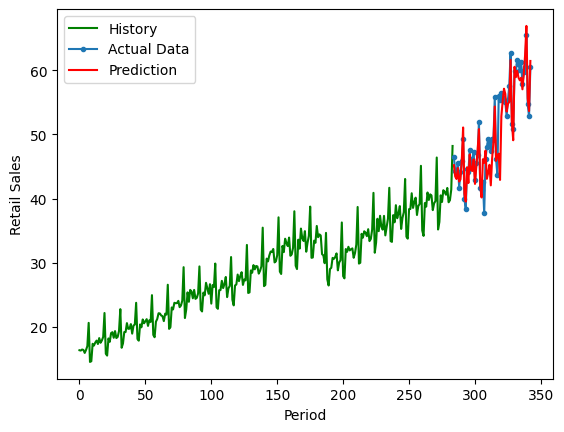

In [50]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History") # plots training data labels
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data") # plots actual testing data labels
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Prediction") # plots predictions for testing data
plt.ylabel('Retail Sales') # sets label for y-axis
plt.xlabel('Period') # sets label for x-axis
plt.legend() # creates legend
plt.show(); # shows plot

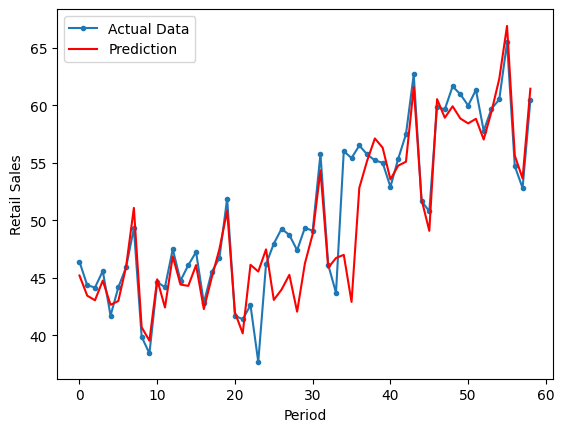

In [51]:
plt.plot(y_test, marker='.', label="Actual Data") # plots actual labels for testing data
plt.plot(y_pred, 'r', label="Prediction") # plots predictions for testing data
plt.ylabel('Retail Sales') # sets label for y-axis
plt.xlabel('Period') # sets label for x-axis
plt.legend() # creates legend
plt.show(); # shows plot

#PS1.B

<p>In this notebook, we are creating a model that predicts retail sales for a period given the retail sales for previous periods. This has been done using a fully connected neural network. In our case, we are using the first 80% of data to train the model and the remaining 20% to test it (compare predictions with actual labels). Additionally, we are using the previous 16 periods to predict the sales for each period. See commented code in previous part.</p>

#PS1.C

In [52]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten # imports different layer objects for 1D CNN
new_model = Sequential() # creates model structure
new_model.add(Conv1D(filters=16, kernel_size=4, activation='relu', input_shape=(16, 1))) # creates convolutional layer
new_model.add(MaxPooling1D(pool_size=2)) # creates pooling layer
new_model.add(Flatten()) # creates flattening layer
new_model.add(Dense(1, activation='linear')) # creates fully connected output layer
new_model.compile(loss='mean_squared_error', optimizer=Adam(0.001)) # compiles model

In [53]:
new_history = new_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.1, verbose=1, shuffle=False) # trains model

Epoch 1/500
8/8 [==============================] - 1s 24ms/step - loss: 415.1215 - val_loss: 609.7651
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 206.9470 - val_loss: 268.7532
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 76.6502 - val_loss: 76.6471
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 16.9501 - val_loss: 11.7218
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 5.7522 - val_loss: 12.7510
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 8.7847 - val_loss: 17.1191
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 7.7660 - val_loss: 12.0290
Epoch 8/500
8/8 [==============================] - 0s 6ms/step - loss: 5.3697 - val_loss: 8.6565
Epoch 9/500
8/8 [==============================] - 0s 6ms/step - loss: 4.8301 - val_loss: 8.5662
Epoch 10/500
8/8 [==============================] - 0s 7ms/step - loss: 4.9927 - val_loss: 8.6822
Epoch 11/500


In [57]:
new_y_pred = new_model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


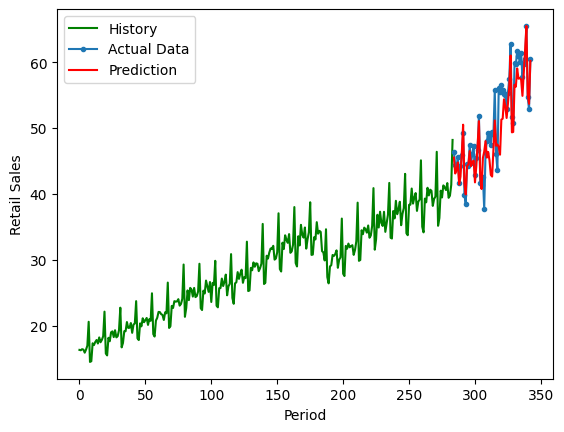

In [60]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History") # plots training data labels
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data") # plots actual testing data labels
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), new_y_pred, 'r', label="Prediction") # plots predictions for testing data
plt.ylabel('Retail Sales') # sets label for y-axis
plt.xlabel('Period') # sets label for x-axis
plt.legend() # creates legend
plt.show(); # shows plot

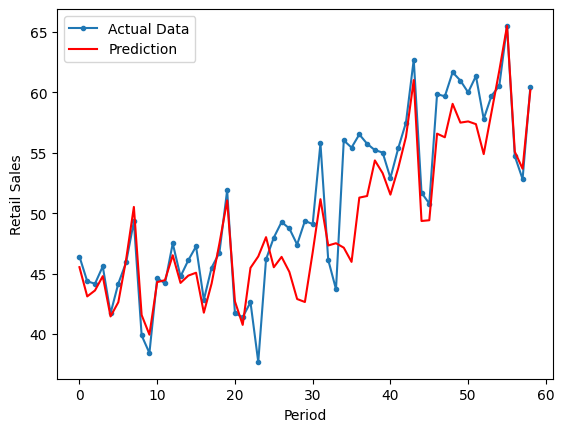

In [61]:
plt.plot(y_test, marker='.', label="Actual Data") # plots actual labels for testing data
plt.plot(new_y_pred, 'r', label="Prediction") # plots predictions for testing data
plt.ylabel('Retail Sales') # sets label for y-axis
plt.xlabel('Period') # sets label for x-axis
plt.legend() # creates legend
plt.show(); # shows plot

<p>My model consisted of a 1 dimensional convolutional layer, a 1 dimensional max pooling layer, a flattening layer, and a dense layer. These layers were organized sequentially. For the convolutional layer, I chose 16 layers with kernel size of 4 because they gave me good predictions. I chose ReLU as the activation function to introduce some non-linearity into the output of the layer and improve its learning ability. Then, I chose an input shape of (16, 1) because those are the dimensions of the input data; there are sales for the 16 periods prior to the one being predicted stored as 16 elements in a 1 dimensional array. This convolutional layer allowed us to apply filters to the input data, thereby generating feature maps. Then, I added a MaxPooling layer to reduce the dimensions of those input feature maps while keeping the important information. The pool size because it gave good performance. After this, I added a flattening layer so that the output of the previous layers could be fed to the fully connected layer. Finally, I added a fully connected layer with one neuron that outputs the final prediction. It has a linear activation function as we want to produce continuous output since it's a regression problem. This is also why mean squared error was used as the loss function. Aside from this, the Adam optimizer, a learning rate of 0.001, 500 epochs, a batch size of 32, and a validation split of 10% were all used since they were also used in the MLP solution.</p>

#PS1.D

<p>In terms of training time, the MLP took much longer to train than the CNN. This can be explained by the much lower number of parameters for CNNs, resulting in a lot less computations having to be done. This is because while MLPs have each neuron connected to every neuron of the previous layer, CNNs have each filter applied to a portion of the input. However, the performance of the MLP was better than the CNN as shown by the loss being larger for the CNN and by the graphs comparing the predictions and actual labels for the testing data. This may be due to a lack of training data as there were a little short of 400 ground truths. This may have made it difficult for the CNN to learn to pick out important features. This also may be attributed to a lack of hyperparameter tuning or adjustment. Since the MLP got its parameters chosen by people who were presenting the notebook to teach time series forecasting with MLPs, they likely chose very good parameters while the CNNs parameters were chosen mostly arbitrarily or to be consistent with the MLP. Finally, the CNN may have required more or less filters or layers to better capture the features of the data. I chose a relatively minimal neural network architecture for the sake of simplicity. While it is often a common culprit, I don't think the poorer performance was due to overfitting because we ended up using a validation split for the training data.</p>